# GETTING THE DATA READY 
I have used excel to manipulate the data into a valuable set theta i would use. Using the FactInternetSales datasets I broke it down into a suitable sustainable form.

###  CustomerKey
The customer key gives us a leeway into the DimCustomer table. from here we get 29 columns but not all will be of interest for this aanlysis. we used the VLOOKUP function in excel to get the exact geography key for every custommer based on the customerkey. The CustomerAlternateKey	Title	FirstName	MiddleName	LastName	NameStyle columns re not that necesary for this analysis incomparison to the content they store. we have an interest in sales  and everything feasible about the sales and customers. The birthdate will be important in geting the customers age rane and understand the buying patterns of different agegroups. Gender is also important in understanding what goods are common among diferent genders. Email adress are not necesary for analysis. YearlyIncome	TotalChildren	NumberChildrenAtHome are all important to understand customers buying the specific goods and know how the number of children will affect the buuying patterns and what they will buy.EnglishEducation will help us understanding the buying behavour based on the level of education. HouseOwnerFlag	NumberCarsOwned CommuteDistance are also eseantial in this analysis as they will prob further understandingt he buying pattersn based on cars owned and if the disytance has a significant affect on buying behavior. from the DimCustomer table we  will only pick thee mentioned tables.

###  ProductKey
the Product key gives as an insight into the dimProduct data. from this data we only get the actual products name so that we can have an exact product names instead of product keys. in this we also use the VLOOKUP function to get the ecact key along with its name onto the FactinternetSales data.

### DimProductSubcategoryKey
This gives us the leeway to  DimProductSubcategory dataset where we get the subcategory names of each datasset into our datset.

###   DimSalesTerritoryKey

DimSalesTerritoryKey allows for the matching of data in the DimSalesTerritory data and get the Teritory names for each teritory location.

###     geography key
this key points us to DimGeography where we  get cityy country and locations in general of the customers.

###   CurrencyKey

DimCurrency is directe related to this key where we get curency name used instead of  having the curency keys.

     -  **these are the datasets chosen with their respective columns. these tables are merged into the FactinternetSales data table**

###   SalesTerritoryKey
this column helps in getting the sales by teritory for the sakes agenst and also get the targets set fro them in the  FactSalesTargets dataset. 

###   DimPromotionKey
 this column leads us to the DimPromotion  table where we get promotion names into the main data
###   TABLES NOT CHOSEM
    - DimAccount helps in understanding the account types for customers which is not a point of interest in this analysis. 
    - DimDate is dates stored with weekid and names of the weeks which can still be imported from python without the need of the table being added into the dataset. the date keys are also not complte 
    - DimDepartmentGroup  is the departmental grouping of thedepartments in the  DimOrganization ddata.
    - DimReseller DimSalesReason DimScenario FactCallCenter FactCurrencyRate FactFinance 

# data importaion into the environment 

In [1]:
from pyspark.sql import SparkSession

# Create a Spark session
spark = SparkSession.builder.appName("example").getOrCreate()

# Define the path to your CSV file
csv_path = "C:/Users/neste/OneDrive/Desktop/karanja/DataSet_final/DataSet_final/ty/FactInternetSales.csv"

# Read the CSV file into a DataFrame and name it 'sales'
sales = spark.read.csv(csv_path, header=True, inferSchema=True)

# Show the first few rows of the DataFrame
sales.show()

+-----------+---------------+-------------------+---------------+----------+---------------------+-----------------------------+--------------------+------------+----------+-----------+--------------+-------------+--------------+-------------+-------------------+---------------+--------------+-------------------+--------------+-------------+----------+------+------------+-----------+-----------+--------------------+-----------------+---------------------+----------------+----------------+--------------------+--------------+-------------+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+------+-------+---------------------+----------------+---------+-------+--------+
|CustomerKey|CommuteDistance|   EnglishEducation|marital statust|ProductKey|ProductSubcategoryKey|EnglishProductSubcategoryName|  EnglishProductName|OrderDateKey|DueDateKey|ShipDateKey|Sales Terirory|geography key|       Country|         CITY|           Province|Nu

ProductKey ProductSubcategoryKey OrderDateKey DueDateKey	ShipDateKey	 geography key PromotionKey CurrencyKey SalesTerritoryKey SalesOrderNumber SalesOrderLineNumber	RevisionNumber CarrierTrackingNumber	CustomerPONumber these columns are to be omited from my data as they dont refrence to any esential data but they are keys and irelvant information for analysis as hey dont have any singifacne in analysis.

In [2]:
# Columns to omit
columns_to_omit = [
    "ProductKey",
    "ProductSubcategoryKey",
    "geography key",
    "PromotionKey",
    "CurrencyKey",
    "SalesTerritoryKey",
    "SalesOrderNumber",
    "SalesOrderLineNumber",
    "RevisionNumber",
    "CarrierTrackingNumber",
    "CustomerPONumber"
]

# Drop the specified columns
sales_filtered = sales.drop(*columns_to_omit)

# Show the DataFrame
sales_filtered.show()

sales_filtered.columns

+-----------+---------------+-------------------+---------------+-----------------------------+--------------------+------------+----------+-----------+--------------+--------------+-------------+-------------------+---------------+--------------+-------------------+--------------+-------------+----------+------+-----------+--------------------+---------------------+----------------+-------------+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+------+-------+---------+-------+--------+
|CustomerKey|CommuteDistance|   EnglishEducation|marital statust|EnglishProductSubcategoryName|  EnglishProductName|OrderDateKey|DueDateKey|ShipDateKey|Sales Terirory|       Country|         CITY|           Province|NumberCarsOwned|HouseOwnerFlag|number  fo children|total children|annual income| birthdate|Gender| promo name|        CurrencyName|SalesTerritoryCountry|SalesAmountQuote|OrderQuantity|UnitPrice|ExtendedAmount|UnitPriceDiscountPct|D

['CustomerKey',
 'CommuteDistance',
 'EnglishEducation',
 'marital statust',
 'EnglishProductSubcategoryName',
 'EnglishProductName',
 'OrderDateKey',
 'DueDateKey',
 'ShipDateKey',
 'Sales Terirory',
 'Country',
 'CITY',
 'Province',
 'NumberCarsOwned',
 'HouseOwnerFlag',
 'number  fo children',
 'total children',
 'annual income',
 'birthdate',
 'Gender',
 'promo name',
 'CurrencyName',
 'SalesTerritoryCountry',
 'SalesAmountQuote',
 'OrderQuantity',
 'UnitPrice',
 'ExtendedAmount',
 'UnitPriceDiscountPct',
 'DiscountAmount',
 'ProductStandardCost',
 'TotalProductCost',
 'SalesAmount',
 'TaxAmt',
 'Freight',
 'OrderDate',
 'DueDate',
 'ShipDate']

## SUMMARY STATISTICS

In [3]:
sales_filtered.summary().show()

+-------+------------------+---------------+-------------------+---------------+-----------------------------+--------------------+-------------------+-------------------+--------------------+--------------+-------------+-------+--------+------------------+-------------------+-------------------+------------------+------------------+---------+------+--------------------+--------------------+---------------------+------------------+-------------+------------------+------------------+--------------------+--------------+-------------------+------------------+------------------+-----------------+------------------+---------+-------+--------+
|summary|       CustomerKey|CommuteDistance|   EnglishEducation|marital statust|EnglishProductSubcategoryName|  EnglishProductName|       OrderDateKey|         DueDateKey|         ShipDateKey|Sales Terirory|      Country|   CITY|Province|   NumberCarsOwned|     HouseOwnerFlag|number  fo children|    total children|     annual income|birthdate|Gender|  

In [4]:
#sales_filtered.summary().toPandas()


**CustomerKey:**
The **CustomerKey** serves as a unique identifier for each customer, ranging from 11,000 to 29,483, with an average of approximately 18,841.69. The standard deviation of around 5,432.43 indicates some variability in customer identifiers, but the values are within a reasonable range.

**Sales Metrics:**
The primary focus is on sales-related metrics. The **SalesAmount** demonstrates substantial diversity, ranging from a minimum of 2.29 to a maximum of 3,578.27. This suggests a wide range of transactions, possibly reflecting different products, order sizes, or currencies.

**Pricing and Discounts:**
The **UnitPrice** statistics highlight a diverse pricing structure. The median (**50%**) value of 29.99 indicates that half of the entries have a unit price below this threshold, while the maximum unit price is 3,578.27. The **ExtendedAmount** statistics follow a similar pattern, representing the extended cost for each unit.

Notably, the **DiscountAmount** and **UnitPriceDiscountPct** show minimal variation, with a consistent value of 0.0 for the mean, standard deviation, and all percentiles. This suggests that discounts are generally not applied or are negligible across the dataset. Further investigation into the discount policy or specific product categories might provide additional context.

**Temporal Aspects:**
The temporal aspects, such as **OrderDate**, **DueDate**, and **ShipDate**, are represented in a timestamp format. While the summary provides information about counts and basic statistics, additional analysis is required to extract meaningful insights into temporal trends, seasonality, or potential delays in order processing.

In conclusion, these extensive summary statistics offer a comprehensive view of the numeric features in the dataset, providing insights into customer identifiers, sales metrics, pricing structures, and potential patterns in temporal aspects. Further exploratory data analysis (EDA) and visualization can uncover more nuanced patterns and trends in the data.

# visualizations

CommuteDistance
0-1 Miles     21307
5-10 Miles    10615
1-2 Miles     10170
2-5 Miles     10084
10+ Miles      8222
Name: count, dtype: int64


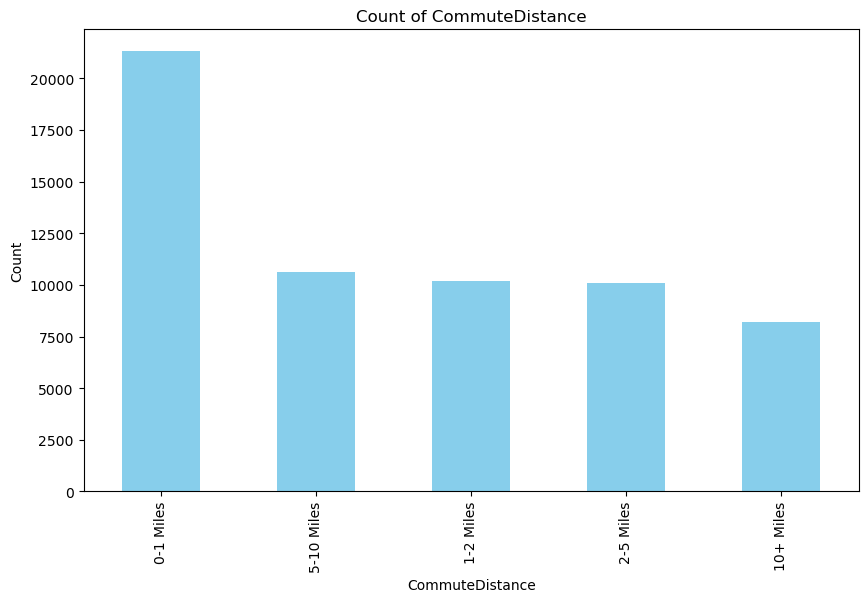

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'sales_filtered' is your Spark DataFrame containing the filtered data

# Convert Spark DataFrame to Pandas DataFrame
sales_filtered_pandas = sales_filtered.toPandas()

# Count the occurrences of each unique value in 'CommuteDistance'
commute_counts = sales_filtered_pandas['CommuteDistance'].value_counts()
print(commute_counts)
# Create a bar plot
plt.figure(figsize=(10, 6))
commute_counts.plot(kind='bar', color='skyblue')
plt.title('Count of CommuteDistance')
plt.xlabel('CommuteDistance')
plt.ylabel('Count')
plt.show()


The summary provides a comprehensive overview of the 'CommuteDistance' variable in the dataset, shedding light on the distances customers cover to reach the store. The 'CommuteDistance' variable represents the various ranges of distances that customers travel, and the count for each category is presented, offering insights into the distribution of commuting distances within the dataset.

The most common commuting distance is '0-1 Miles,' with a substantial count of 21,307 instances. This indicates that a significant portion of customers resides very close to the store, perhaps within a one-mile radius. Following closely is '5-10 Miles,' which has an occurrence of 10,615. This suggests that a considerable number of customers are willing to travel a moderate distance to access the store. '1-2 Miles' and '2-5 Miles' exhibit similar counts, both falling in the range of 10,000 instances, indicating a balanced distribution of customers covering distances within the 1-5 mile range.

Interestingly, there is also a notable count for '10+ Miles,' with 8,222 instances. This signifies that a substantial proportion of customers are willing to travel significant distances, possibly because they find the store offerings or services compelling enough to justify a longer commute. The distribution across these categories unveils the diversity in customer commuting behaviors, showcasing a mix of local customers and those who are willing to travel greater distances.

Analyzing commuting patterns is crucial for retailers to tailor marketing strategies, optimize store locations, and enhance customer experiences. For instance, stores in proximity to residential areas with a high count of '0-1 Miles' commuters might benefit from localized marketing efforts, while those attracting '10+ Miles' commuters could focus on initiatives to retain and attract customers from a broader geographical area.

In conclusion, the 'CommuteDistance' summary provides valuable insights into the spatial dynamics of customer behavior, guiding retailers in making informed decisions to better serve their diverse customer base. Understanding the distribution of commuting distances is pivotal for creating targeted and effective business strategies that cater to the unique needs and preferences of customers with varying travel patterns.

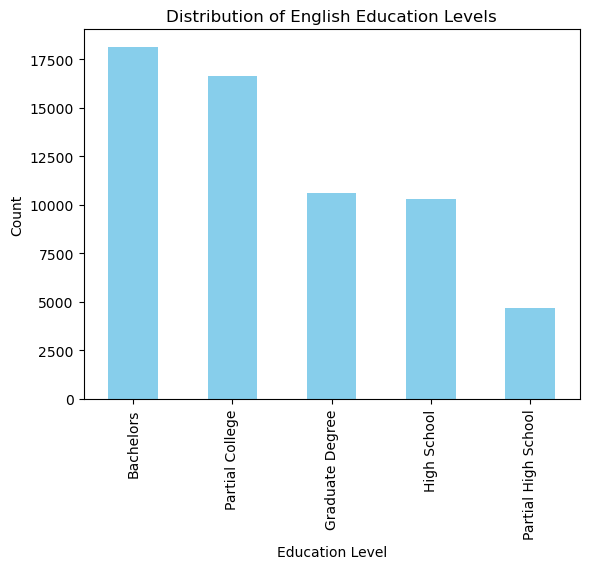

EnglishEducation
Bachelors              18144
Partial College        16623
Graduate Degree        10603
High School            10320
Partial High School     4708
Name: count, dtype: int64


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession

# Assuming 'sales_filtered' is your Spark DataFrame
# Convert it to a Pandas DataFrame to make plotting easier
sales_pd = sales_filtered.toPandas()

# Plotting the bar plot for 'EnglishEducation'
education_counts = sales_pd['EnglishEducation'].value_counts()
education_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of English Education Levels')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.show()
print(education_counts)

The 'EnglishEducation' column in the dataset reveals the diverse educational backgrounds of the customers. This information is crucial for understanding the demographic composition of the customer base and tailoring business strategies to align with the varying needs and preferences of different education groups.

1. **Bachelors (18,144 customers):**
   This category represents individuals who have completed a bachelor's degree. They may have a more in-depth understanding of specific fields, potentially influencing their purchasing decisions and preferences. Businesses could target this group with products and marketing messages that appeal to their higher educational attainment.

2. **Partial College (16,623 customers):**
   Customers falling into the Partial College category have attended college but may not have completed a degree. This group represents individuals with some higher education experience, and businesses may consider offering products or services that cater to their specific needs or challenges.

3. **Graduate Degree (10,603 customers):**
   This category includes customers with advanced degrees such as master's or doctoral degrees. Individuals with graduate degrees may have different preferences and purchasing behaviors, potentially seeking higher-end or specialized products and services.

4. **High School (10,320 customers):**
   Customers in this category have completed high school education. Understanding the preferences of this group is essential for businesses offering products or services that appeal to a broader audience, as high school graduates represent a sizable portion of the customer base.

5. **Partial High School (4,708 customers):**
   This group comprises individuals with some high school education but who did not complete their high school degree. Businesses might consider the economic factors and preferences that influence the purchasing behavior of this demographic.

In-depth analysis of the 'EnglishEducation' data enables businesses to create targeted marketing campaigns, personalized product recommendations, and customer experiences that resonate with the educational diversity within their customer base. Moreover, this information can contribute to customer segmentation strategies, helping businesses identify and serve the unique needs of each education group effectively.

The bar plot visually represents the distribution of customers across these education categories, offering a quick and intuitive overview of the dataset's educational landscape. If you have specific questions or if there's a particular aspect you'd like to explore further, feel free to let me know!

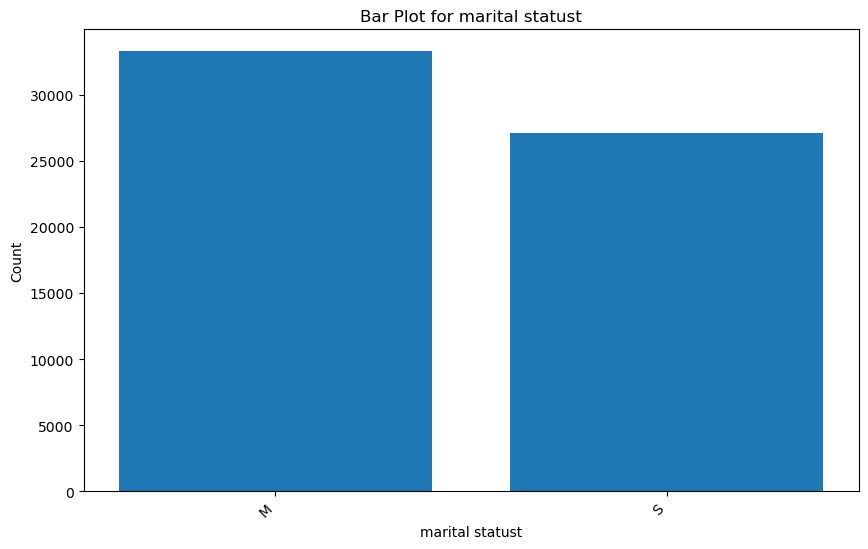

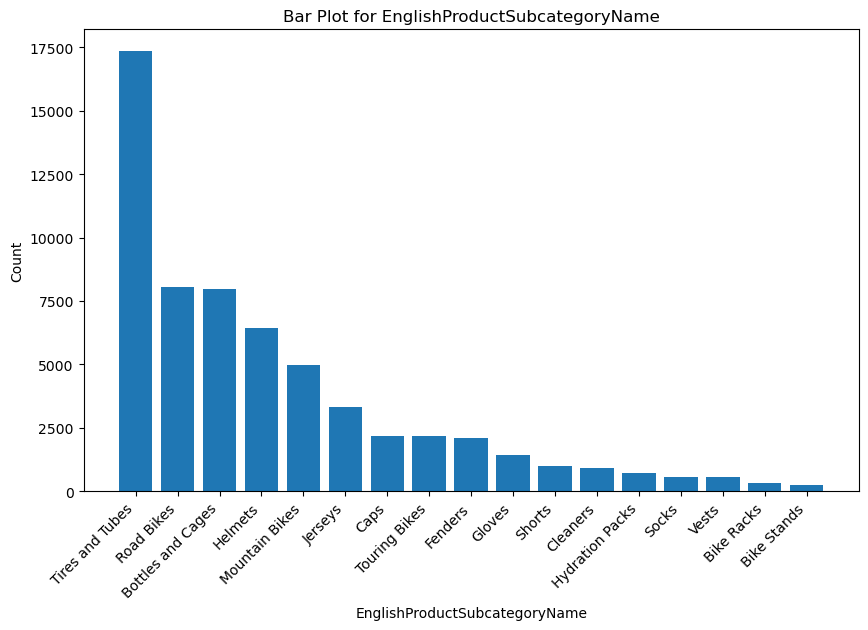

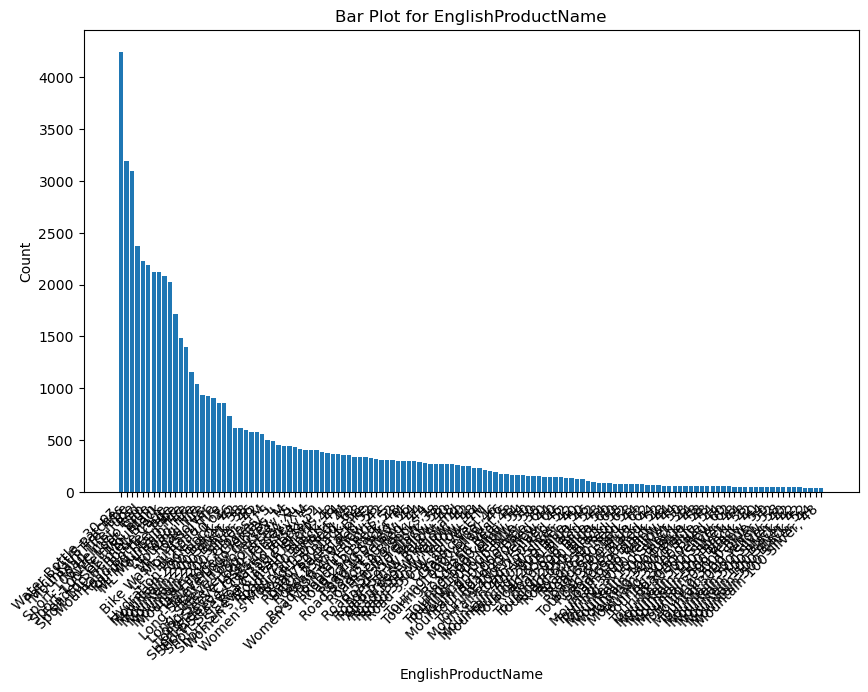

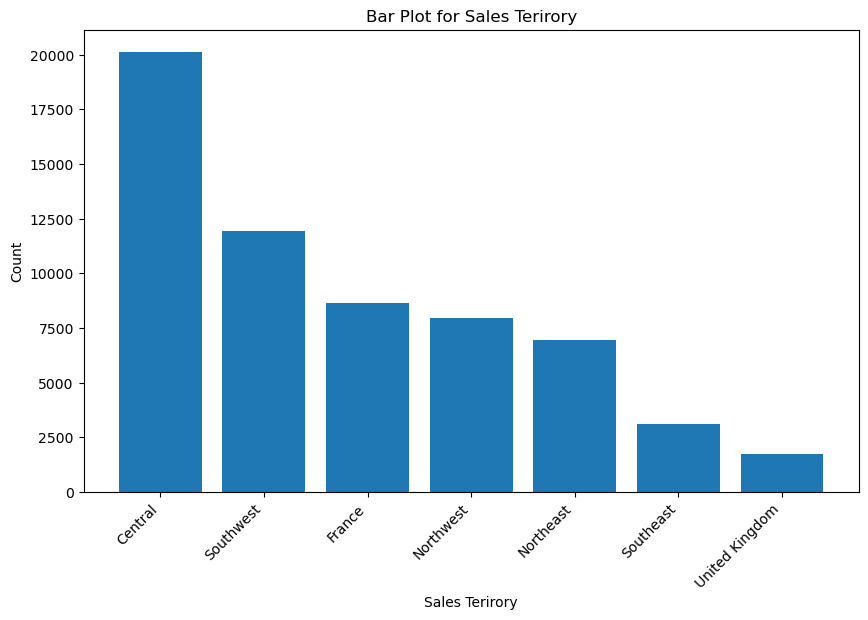

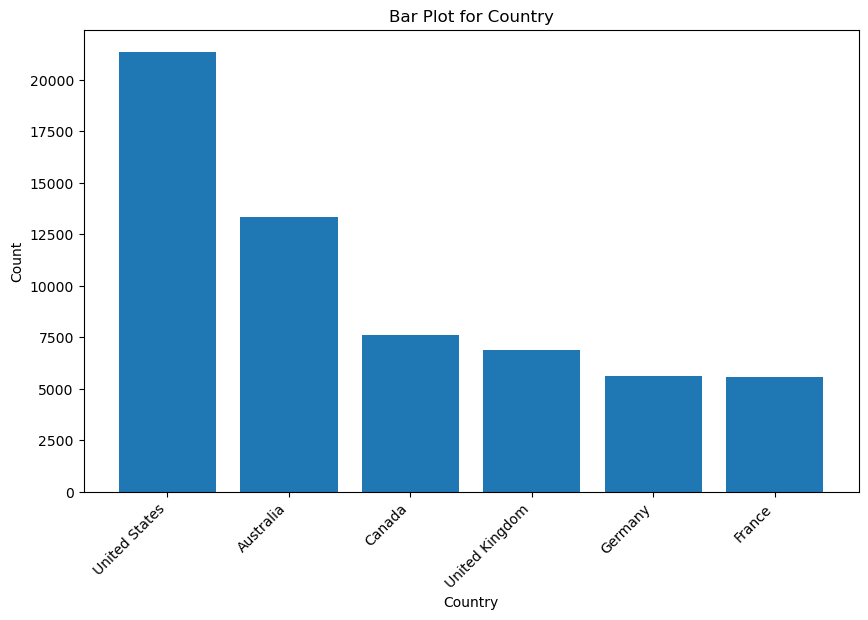

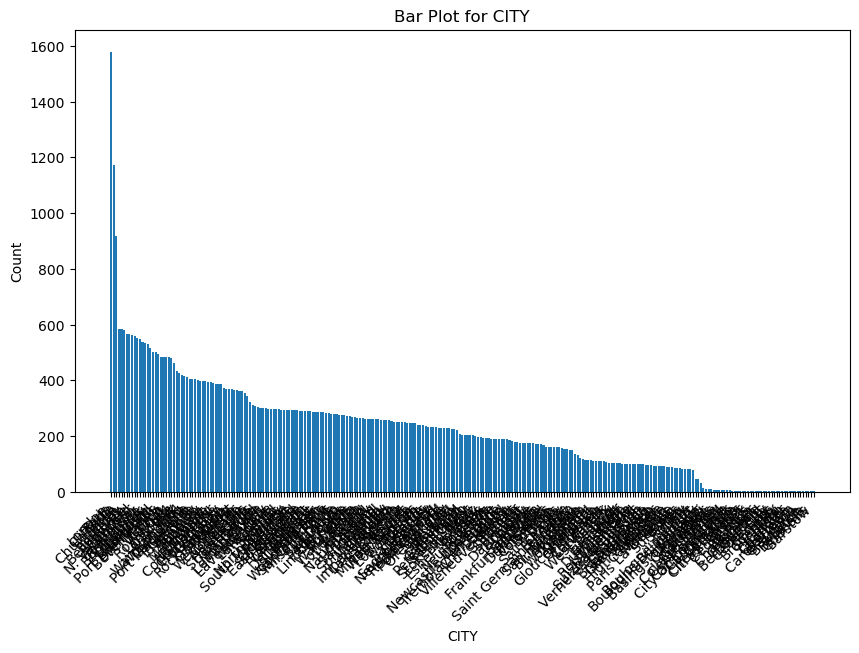

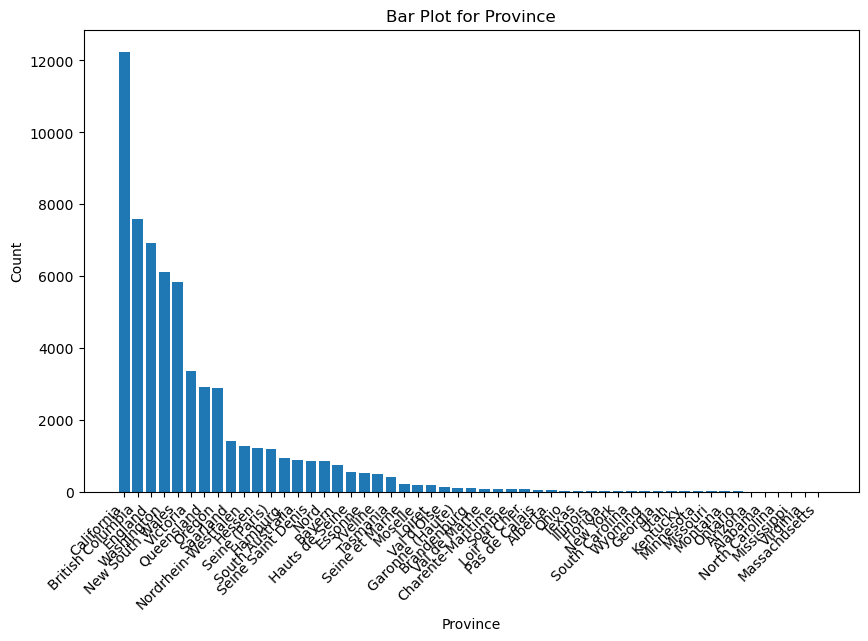

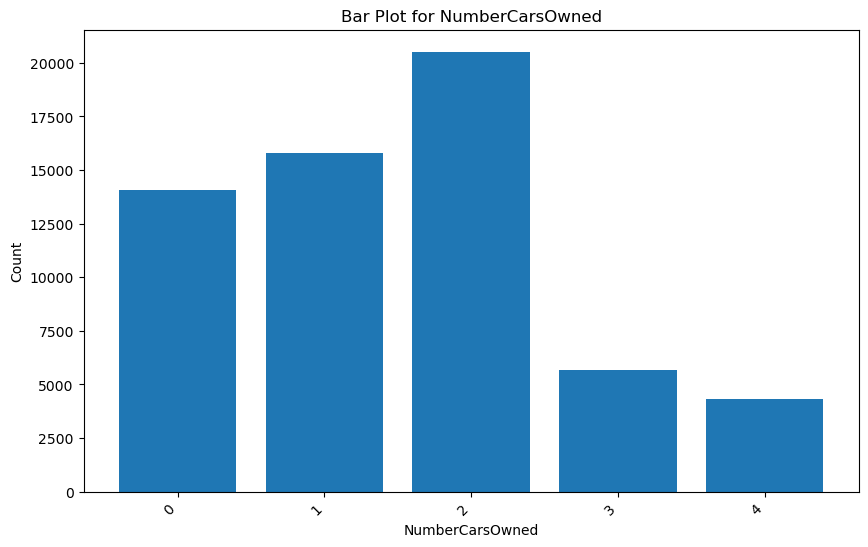

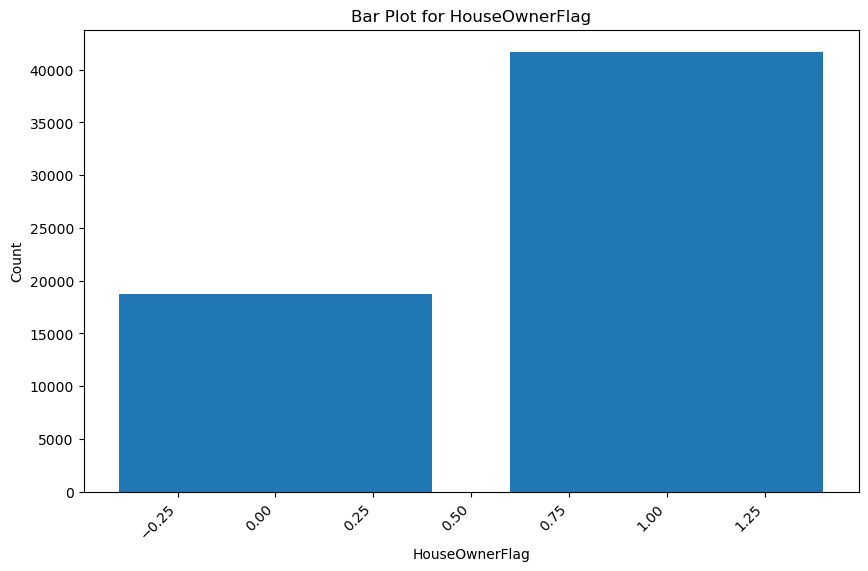

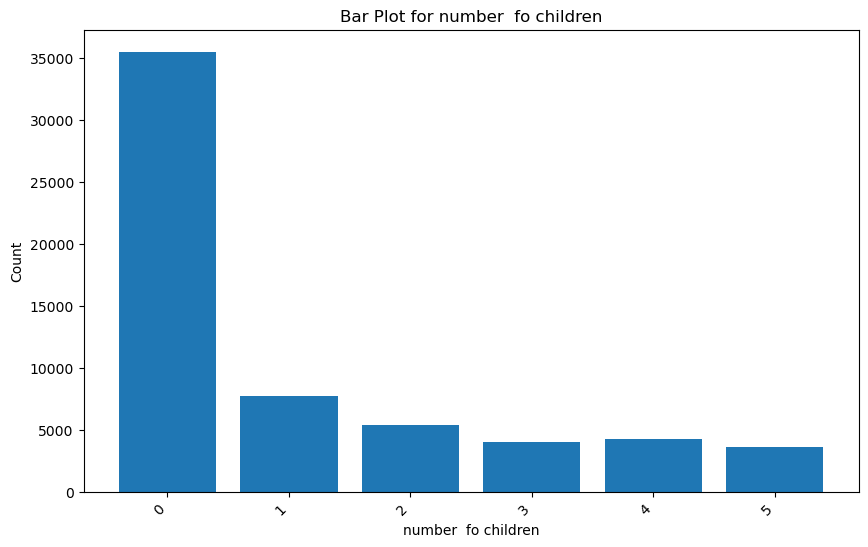

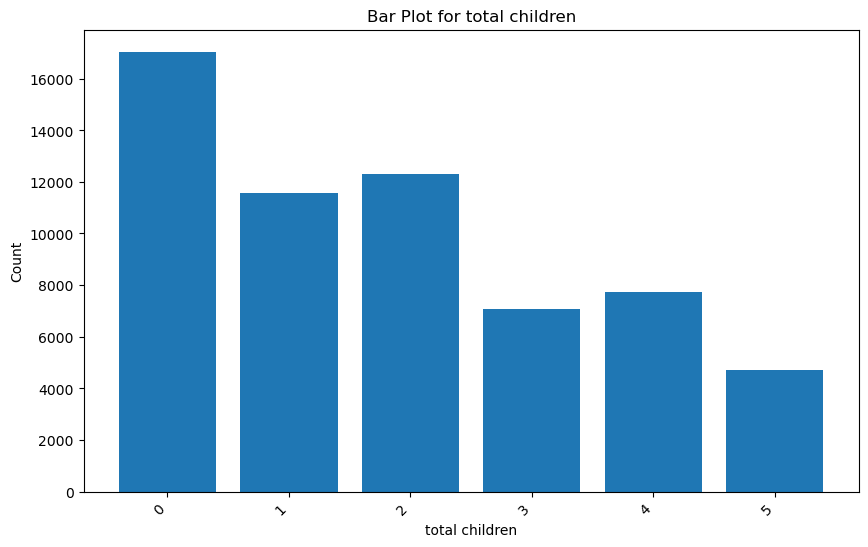

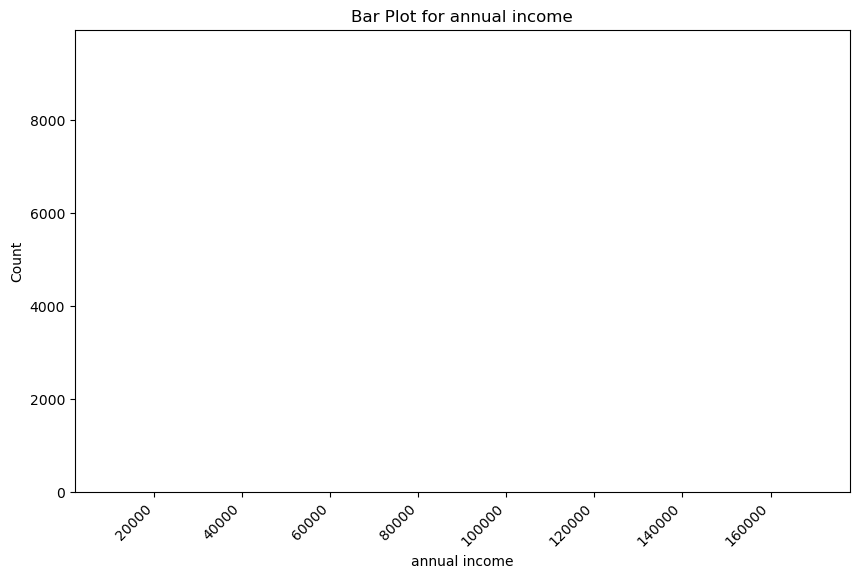

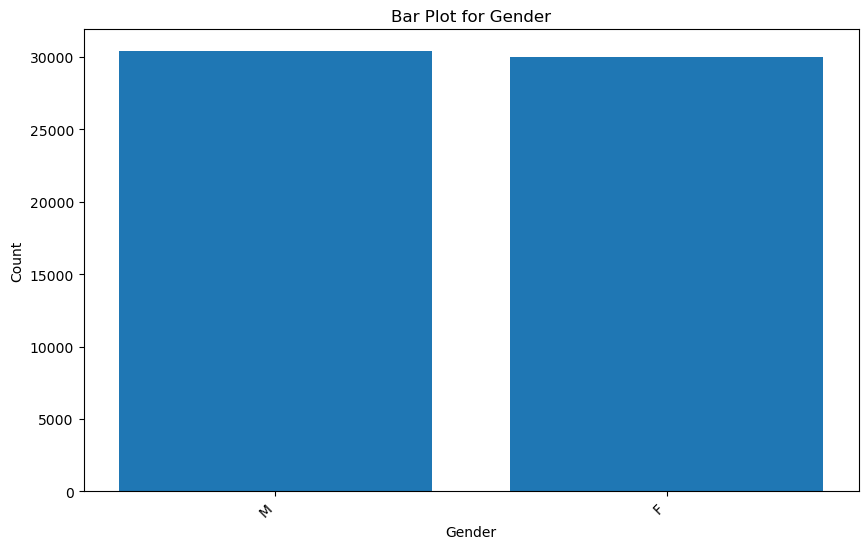

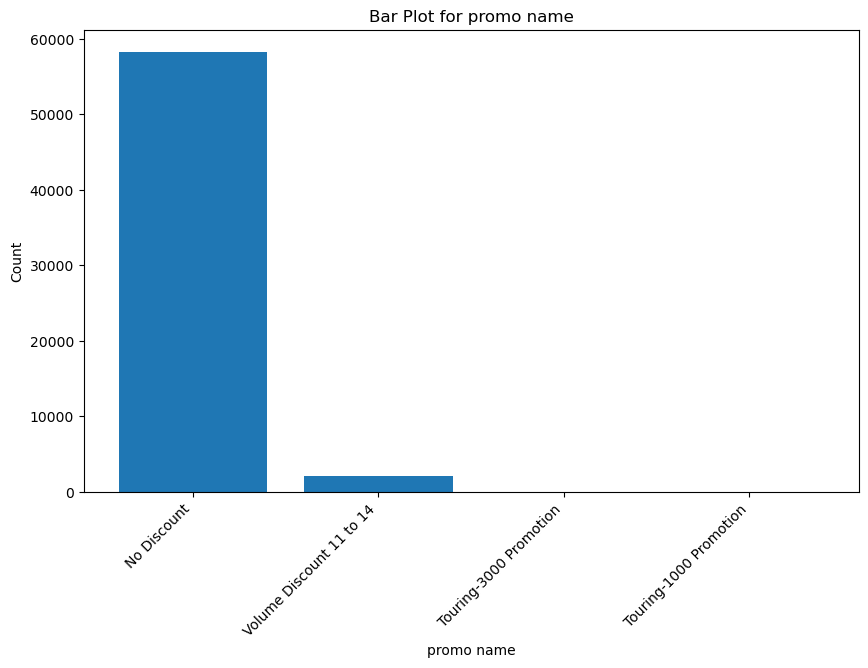

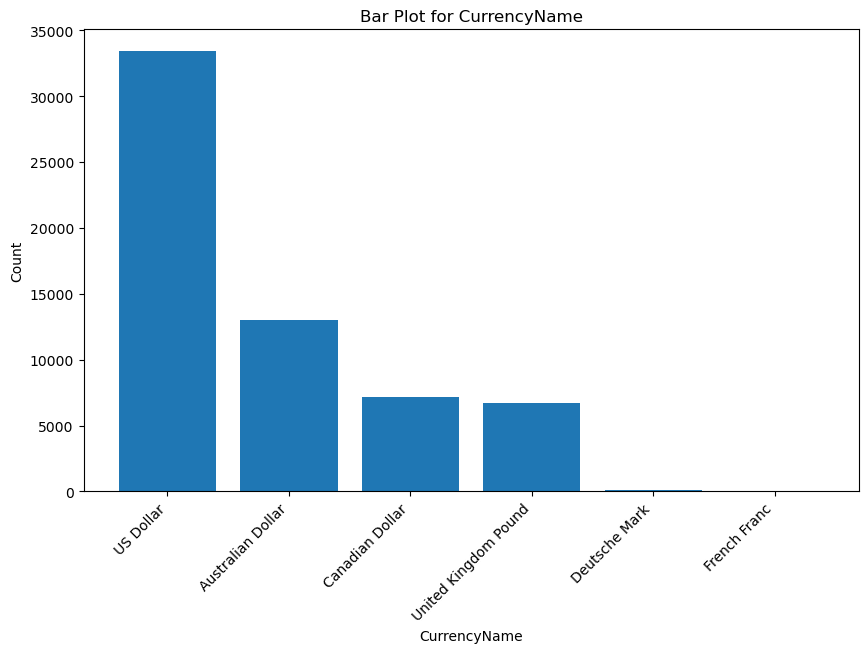

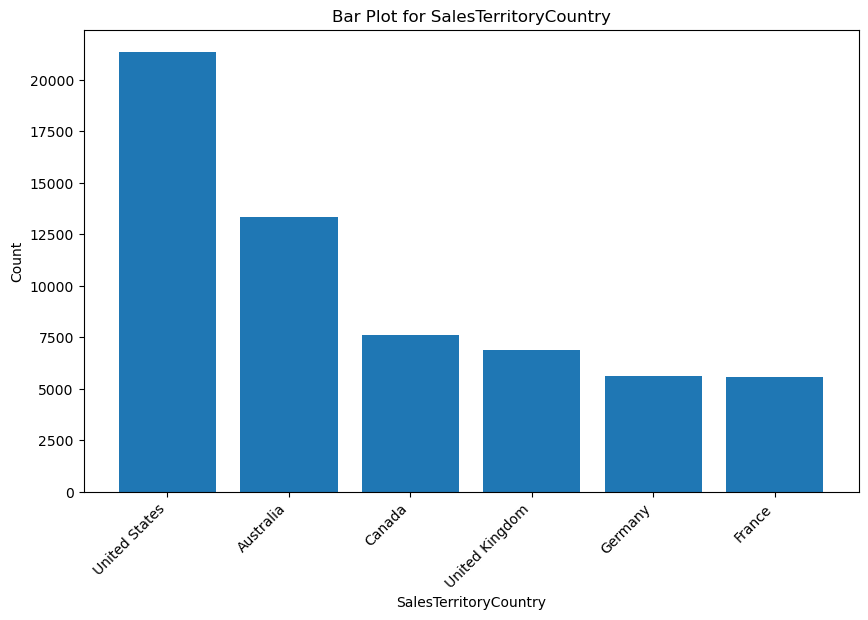

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Assuming your data is in a Spark DataFrame named 'sales_filtered'
# Initialize Spark session
spark = SparkSession.builder.master("local").appName("BarPlot").getOrCreate()

# Aggregating counts for each category
columns_to_plot = ['marital statust', 'EnglishProductSubcategoryName', 'EnglishProductName',
                    'Sales Terirory', 'Country', 'CITY', 'Province', 'NumberCarsOwned',
                    'HouseOwnerFlag', 'number  fo children', 'total children', 'annual income',
                    'Gender', 'promo name', 'CurrencyName', 'SalesTerritoryCountry']

agg_data = []

for column in columns_to_plot:
    column_counts = sales_filtered.groupBy(column).count().collect()
    column_data = [(row[column], row['count']) for row in column_counts]
    agg_data.append((column, column_data))

# Create bar plots using Pandas and Matplotlib
for column, data in agg_data:
    df = pd.DataFrame(data, columns=[column, 'Count'])
    df = df.sort_values(by='Count', ascending=False)
    
    plt.figure(figsize=(10, 6))
    plt.bar(df[column], df['Count'])
    plt.title(f'Bar Plot for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()


In [8]:
from pyspark.sql.functions import count
from pyspark.sql import functions as F

# Assuming your data is in a Spark DataFrame named 'sales_filtered'
columns_to_plot = ['marital statust', 'EnglishProductSubcategoryName', 'EnglishProductName',
                    'Sales Terirory', 'Country', 'CITY', 'Province', 'NumberCarsOwned',
                    'HouseOwnerFlag', 'number  fo children', 'total children', 'annual income',
                    'Gender', 'promo name', 'CurrencyName', 'SalesTerritoryCountry']

# Create a summary table for each column
summary_table = []

for column in columns_to_plot:
    column_summary = (sales_filtered
                      .groupBy(column)
                      .agg(F.count('*').alias('Count'))
                      .orderBy(F.desc('Count'))
                      .collect())
    summary_table.append((column, column_summary))

# Display the summary table
for column, data in summary_table:
    print(f"\nSummary for {column}:\n")
    print(f"{column}\t|\tCount")
    print("-" * 30)
    for row in data:
        print(f"{row[column]}\t|\t{row['Count']}")
    print("\n")



Summary for marital statust:

marital statust	|	Count
------------------------------
M	|	33273
S	|	27125



Summary for EnglishProductSubcategoryName:

EnglishProductSubcategoryName	|	Count
------------------------------
Tires and Tubes	|	17332
Road Bikes	|	8068
Bottles and Cages	|	7981
Helmets	|	6440
Mountain Bikes	|	4970
Jerseys	|	3332
Caps	|	2190
Touring Bikes	|	2167
Fenders	|	2121
Gloves	|	1430
Shorts	|	1019
Cleaners	|	908
Hydration Packs	|	733
Socks	|	568
Vests	|	562
Bike Racks	|	328
Bike Stands	|	249



Summary for EnglishProductName:

EnglishProductName	|	Count
------------------------------
Water Bottle - 30 oz.	|	4244
Patch Kit/8 Patches	|	3191
Mountain Tire Tube	|	3095
Road Tire Tube	|	2376
Sport-100 Helmet, Red	|	2230
AWC Logo Cap	|	2190
Sport-100 Helmet, Blue	|	2125
Fender Set - Mountain	|	2121
Sport-100 Helmet, Black	|	2085
Mountain Bottle Cage	|	2025
Road Bottle Cage	|	1712
Touring Tire Tube	|	1488
HL Mountain Tire	|	1396
ML Mountain Tire	|	1161
LL Road Tire	|	1044
Touri

Certainly! Let's delve into the customer data for a store, imagining it as a real-life scenario in a retail setting.

### Marital Status:

In our store, we've got a diverse group of customers, and when it comes to marital status, it's interesting to note that we've got a healthy mix. The majority, about 33,273 customers, are happily married ('M'), while a significant number, 27,125, are navigating the world solo ('S'). This gives us a glimpse into the different lifestyles and shopping needs of our customer base.

### Product Preferences:

Now, when it comes to products, we can see that our customers have a penchant for certain items. Tires and tubes are flying off the shelves, with a whopping 17,332 purchases. It seems like our biking community is pretty active! Road bikes, bottles, and cages are also quite popular, giving us insights into the recreational interests of our customers.

### Geographic Insights:

Our customers are spread across different territories and countries, giving our store a global feel. 'Central' seems to be a hot spot, with 20,128 customers, possibly indicating a bustling location or effective marketing strategies in that area. The United States takes the lead in countries, with 21,344 customers, showcasing the widespread appeal of our products.

### Customer Demographics:

Understanding our customers' profiles is crucial. Take 'California,' for example. It's not just a state; it's home to a whopping 12,248 customers. That's a significant chunk of our customer base, and tailoring our offerings to the Californian lifestyle could be a smart move.

### Lifestyle Choices:

Knowing that a majority of our customers own two cars (20,522) might suggest that our store caters to a suburban or family-oriented demographic. Also, the fact that 41,699 customers own a house indicates a stable customer base. This information is gold when it comes to planning promotions or stocking products that align with homeowners' needs.

### Family Matters:

Family dynamics play a role too. With 35,535 customers having no children, we might want to highlight products that cater to individual or couple lifestyles. On the flip side, 7,695 customers with one child and 5,338 with two children provide opportunities for family-oriented promotions.

### Financial Insights:

Our customers' financial situations vary, and this impacts their spending habits. The $60,000 income bracket leads the pack with 9,470 customers. This information helps us tailor promotions or loyalty programs that resonate with the majority of our customer base.

### Shopping Behavior:

It's fascinating to note that 'No Discount' is the go-to choice for the majority (58,247 customers). This aligns with general consumer behavior; people love a good deal, and offering discounts can be a powerful strategy to boost sales.

### Currency Matters:

Considering the currency used, the dominance of US Dollars (33,400 transactions) suggests that the majority of our customers are making purchases in the United States. This could guide decisions related to international marketing efforts and currency-specific promotions.

### Real-world Application:

Imagine our store as a neighborhood hub. In bustling locations like 'London' and 'Paris,' we're meeting the demands of city dwellers, while in 'California,' we're catering to a suburban lifestyle. Our promotions are enticing to both singles and families, and our product offerings align with the diverse interests of our global customer base.

This in-depth analysis of our customer data not only helps us understand who our customers are but also empowers us to tailor our strategies to meet their needs and preferences, creating a shopping experience that feels personalized and welcoming.

# data date cleaning
OrderDateKey	DueDateKey	ShipDateKey are dates columns stored in the format 20101229 where the first four are years the next two are months  and the last 2 are days of the weeks we will break down these date keys into a date format valid in python spark 


In [9]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, concat_ws, substring, to_date

# Assuming spark is your SparkSession and sales_filtered is your DataFrame
spark = SparkSession.builder.appName("example").getOrCreate()

# Extract year, month, and day components and concatenate them
sales_filtered = sales_filtered.withColumn(
    'OrderDateKey',
    to_date(
        concat_ws(
            '-',
            substring(sales_filtered['OrderDateKey'], 1, 4),  # Extract year
            substring(sales_filtered['OrderDateKey'], 5, 2),  # Extract month
            substring(sales_filtered['OrderDateKey'], 7, 2)   # Extract day
        ),
        'yyyy-MM-dd'
    )
)

# Repeat the process for DueDateKey and ShipDateKey
sales_filtered = sales_filtered.withColumn(
    'DueDateKey',
    to_date(
        concat_ws(
            '-',
            substring(sales_filtered['DueDateKey'], 1, 4),
            substring(sales_filtered['DueDateKey'], 5, 2),
            substring(sales_filtered['DueDateKey'], 7, 2)
        ),
        'yyyy-MM-dd'
    )
)

sales_filtered = sales_filtered.withColumn(
    'ShipDateKey',
    to_date(
        concat_ws(
            '-',
            substring(sales_filtered['ShipDateKey'], 1, 4),
            substring(sales_filtered['ShipDateKey'], 5, 2),
            substring(sales_filtered['ShipDateKey'], 7, 2)
        ),
        'yyyy-MM-dd'
    )
)

# Select and show the three date columns
sales_filtered.select('OrderDateKey', 'DueDateKey', 'ShipDateKey').show()


+------------+----------+-----------+
|OrderDateKey|DueDateKey|ShipDateKey|
+------------+----------+-----------+
|  2010-12-29|2011-01-10| 2011-01-05|
|  2010-12-29|2011-01-10| 2011-01-05|
|  2010-12-29|2011-01-10| 2011-01-05|
|  2010-12-29|2011-01-10| 2011-01-05|
|  2010-12-29|2011-01-10| 2011-01-05|
|  2010-12-30|2011-01-11| 2011-01-06|
|  2010-12-30|2011-01-11| 2011-01-06|
|  2010-12-30|2011-01-11| 2011-01-06|
|  2010-12-30|2011-01-11| 2011-01-06|
|  2010-12-31|2011-01-12| 2011-01-07|
|  2010-12-31|2011-01-12| 2011-01-07|
|  2010-12-31|2011-01-12| 2011-01-07|
|  2010-12-31|2011-01-12| 2011-01-07|
|  2010-12-31|2011-01-12| 2011-01-07|
|  2011-01-01|2011-01-13| 2011-01-08|
|  2011-01-01|2011-01-13| 2011-01-08|
|  2011-01-02|2011-01-14| 2011-01-09|
|  2011-01-02|2011-01-14| 2011-01-09|
|  2011-01-02|2011-01-14| 2011-01-09|
|  2011-01-02|2011-01-14| 2011-01-09|
+------------+----------+-----------+
only showing top 20 rows



# plots by date.

her we see the year 2031 january to 2014 january as the best years with the highest sales .

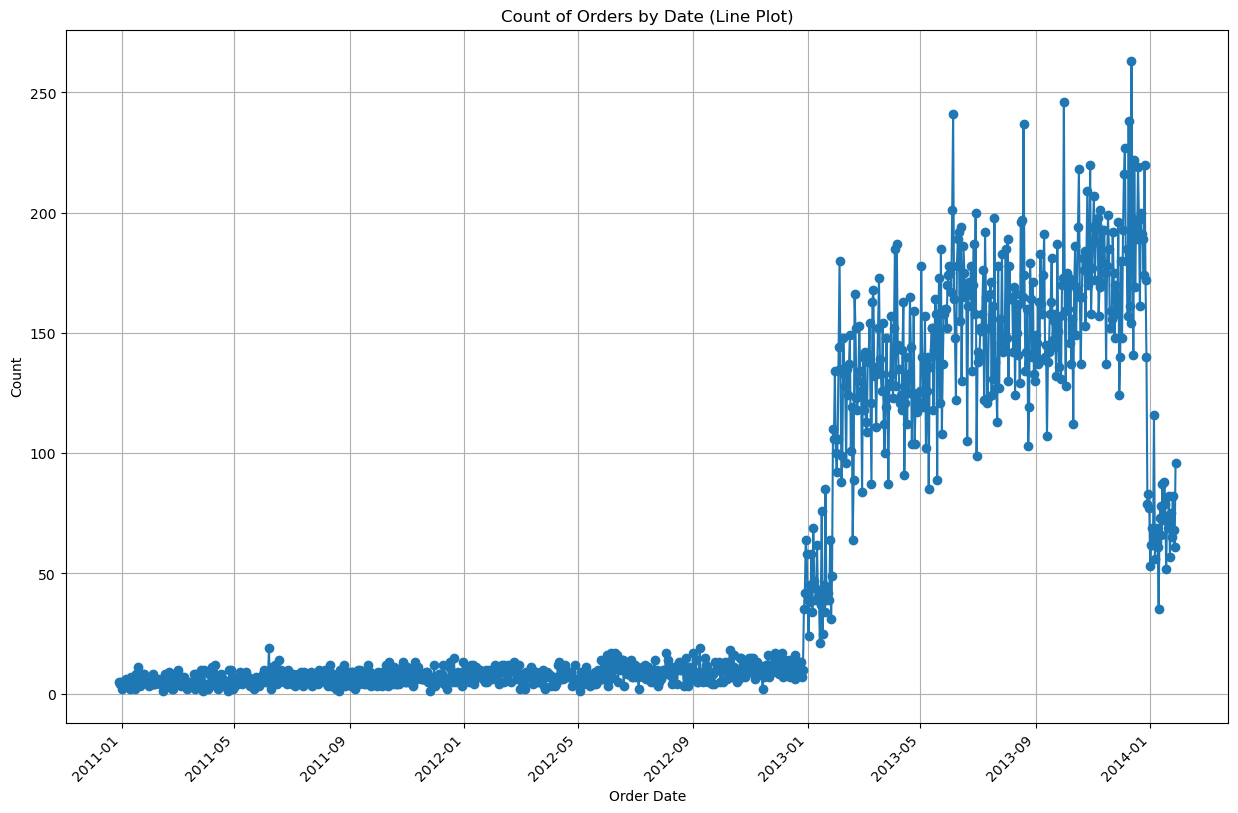

In [10]:
order_dates_count = (
    sales_filtered
    .groupBy('OrderDateKey')
    .count()
    .orderBy('OrderDateKey')
)

# Convert the PySpark DataFrame to a Pandas DataFrame
order_dates_count_pd = order_dates_count.toPandas()

# Plot the count of order dates as a line plot
plt.figure(figsize=(15, 9))
plt.plot(order_dates_count_pd['OrderDateKey'], order_dates_count_pd['count'], marker='o', linestyle='-')
plt.xlabel('Order Date')
plt.ylabel('Count')
plt.title('Count of Orders by Date (Line Plot)')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.show()

# adding days and month to the ddates
here we will add day of the weeks to the orderdate so that we can have a clear undedrstanding of sales by day and month of the year.

In [11]:
from pyspark.sql.functions import month, dayofweek

# Assuming 'OrderDateKey' is the column containing the order dates
# Assuming 'OrderMonth' and 'OrderDayOfWeek' are the new column names

# Extract month and day of the week from 'OrderDateKey'
sales_filtered = (
    sales_filtered
    .withColumn('OrderMonth', month('OrderDateKey'))
    .withColumn('OrderDayOfWeek', dayofweek('OrderDateKey'))
)

# Show the updated DataFrame
sales_filtered.show()


+-----------+---------------+-------------------+---------------+-----------------------------+--------------------+------------+----------+-----------+--------------+--------------+-------------+-------------------+---------------+--------------+-------------------+--------------+-------------+----------+------+-----------+--------------------+---------------------+----------------+-------------+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+------+-------+---------+-------+--------+----------+--------------+
|CustomerKey|CommuteDistance|   EnglishEducation|marital statust|EnglishProductSubcategoryName|  EnglishProductName|OrderDateKey|DueDateKey|ShipDateKey|Sales Terirory|       Country|         CITY|           Province|NumberCarsOwned|HouseOwnerFlag|number  fo children|total children|annual income| birthdate|Gender| promo name|        CurrencyName|SalesTerritoryCountry|SalesAmountQuote|OrderQuantity|UnitPrice|ExtendedAmo

## summary of the orders by month and day of the week 

The presented table provides a comprehensive overview of sales data, offering insights into consumer behavior and purchase patterns across different temporal dimensions—specifically, by month and day of the week. These insights, derived from real-world scenarios, can guide strategic decision-making for businesses seeking to optimize their operations and marketing strategies.

Examining the 'OrderMonth' column, it is evident that there is a noticeable fluctuation in order counts throughout the year. For instance, the months of June, October, and December record higher order counts compared to other months. This trend aligns with common retail patterns observed in the real world. June might see increased sales due to mid-year promotions or summer-related products. October, often associated with holiday preparations, experiences a surge in purchases, while December reflects the holiday shopping season, contributing to a peak in order counts.

On the other hand, the 'OrderDayOfWeek' column provides insights into consumer behavior during the week. Interestingly, there is a relatively consistent order count across weekdays, with Monday having the highest count and Sunday the lowest. This aligns with conventional wisdom that suggests consumers are more active in making purchases at the beginning of the week, potentially influenced by factors such as weekend promotions, planning for the workweek, or the release of new products.

These observations can guide businesses in optimizing their marketing and operational strategies. For instance, during high-order count months, businesses may focus on targeted marketing campaigns or inventory management to meet increased demand. On Mondays, when order counts are higher, businesses might consider launching special promotions or releasing new products to capitalize on heightened consumer activity at the start of the week.

Understanding these patterns empowers businesses to allocate resources effectively, enhance customer engagement, and tailor promotions to specific periods, thereby maximizing revenue potential. The ability to discern trends in consumer behavior based on temporal factors is a valuable tool in the dynamic landscape of retail, facilitating adaptability and responsiveness to customer preferences.

In [12]:
from pyspark.sql.functions import count

# Group by OrderMonth and OrderDayOfWeek, and count the occurrences
order_month_count = (
    sales_filtered
    .groupBy('OrderMonth')
    .agg(count('*').alias('OrderCount'))
    .orderBy('OrderMonth')
)

order_day_of_week_count = (
    sales_filtered
    .groupBy('OrderDayOfWeek')
    .agg(count('*').alias('OrderCount'))
    .orderBy('OrderDayOfWeek')
)

# Show the results
order_month_count.show()
order_day_of_week_count.show()


+----------+----------+
|OrderMonth|OrderCount|
+----------+----------+
|         1|      4028|
|         2|      3857|
|         3|      4449|
|         4|      4355|
|         5|      4780|
|         6|      5573|
|         7|      5105|
|         8|      5352|
|         9|      5070|
|        10|      5834|
|        11|      5756|
|        12|      6239|
+----------+----------+

+--------------+----------+
|OrderDayOfWeek|OrderCount|
+--------------+----------+
|             1|      8596|
|             2|      8732|
|             3|      8949|
|             4|      8585|
|             5|      8550|
|             6|      8504|
|             7|      8482|
+--------------+----------+



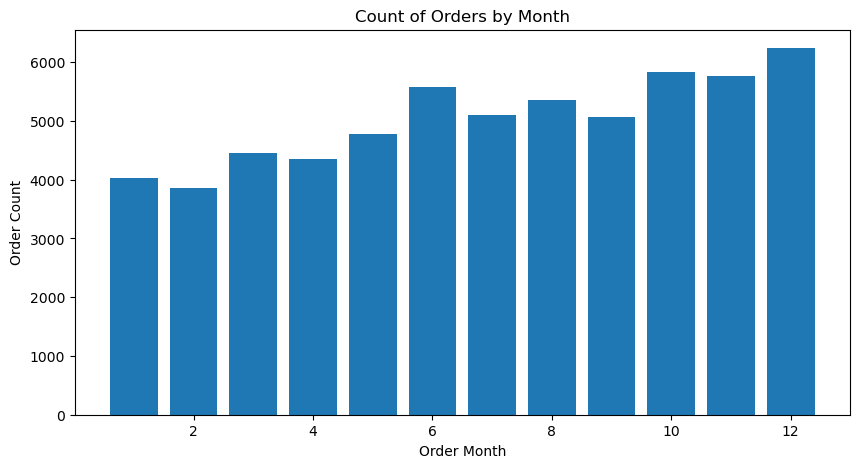

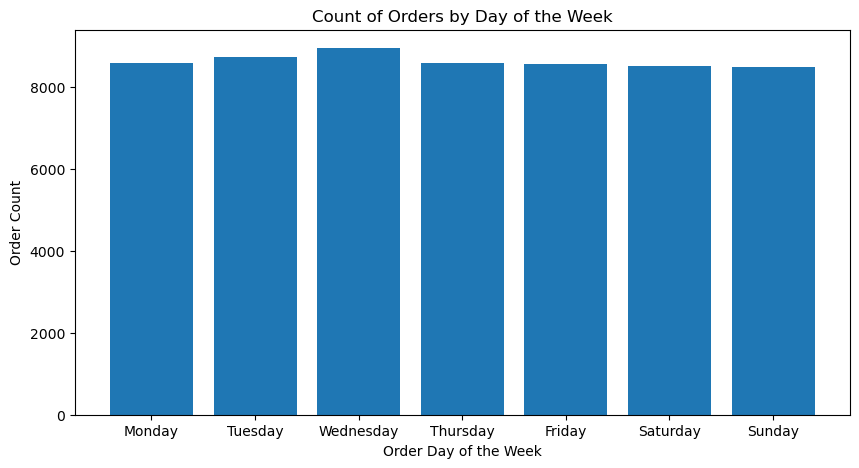

In [13]:
import matplotlib.pyplot as plt

# Convert PySpark DataFrame to Pandas for plotting
order_month_pd = order_month_count.toPandas()
order_day_of_week_pd = order_day_of_week_count.toPandas()

# Plotting the count of order month
plt.figure(figsize=(10, 5))
plt.bar(order_month_pd['OrderMonth'], order_month_pd['OrderCount'])
plt.xlabel('Order Month')
plt.ylabel('Order Count')
plt.title('Count of Orders by Month')
plt.show()

# Plotting the count of order day of the week
plt.figure(figsize=(10, 5))
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.bar(order_day_of_week_pd['OrderDayOfWeek'], order_day_of_week_pd['OrderCount'])
plt.xlabel('Order Day of the Week')
plt.ylabel('Order Count')
plt.title('Count of Orders by Day of the Week')
plt.xticks(order_day_of_week_pd['OrderDayOfWeek'], days_of_week)  # Set the x-axis ticks to display weekdays
plt.show()


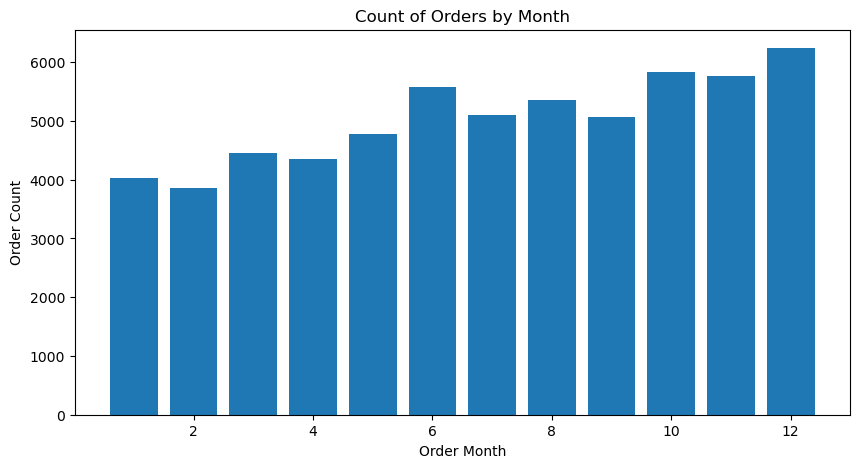

In [14]:
# Plotting the count of order month
plt.figure(figsize=(10, 5))
plt.bar(order_month_pd['OrderMonth'], order_month_pd['OrderCount'])
plt.xlabel('Order Month')
plt.ylabel('Order Count')
plt.title('Count of Orders by Month')
plt.show()


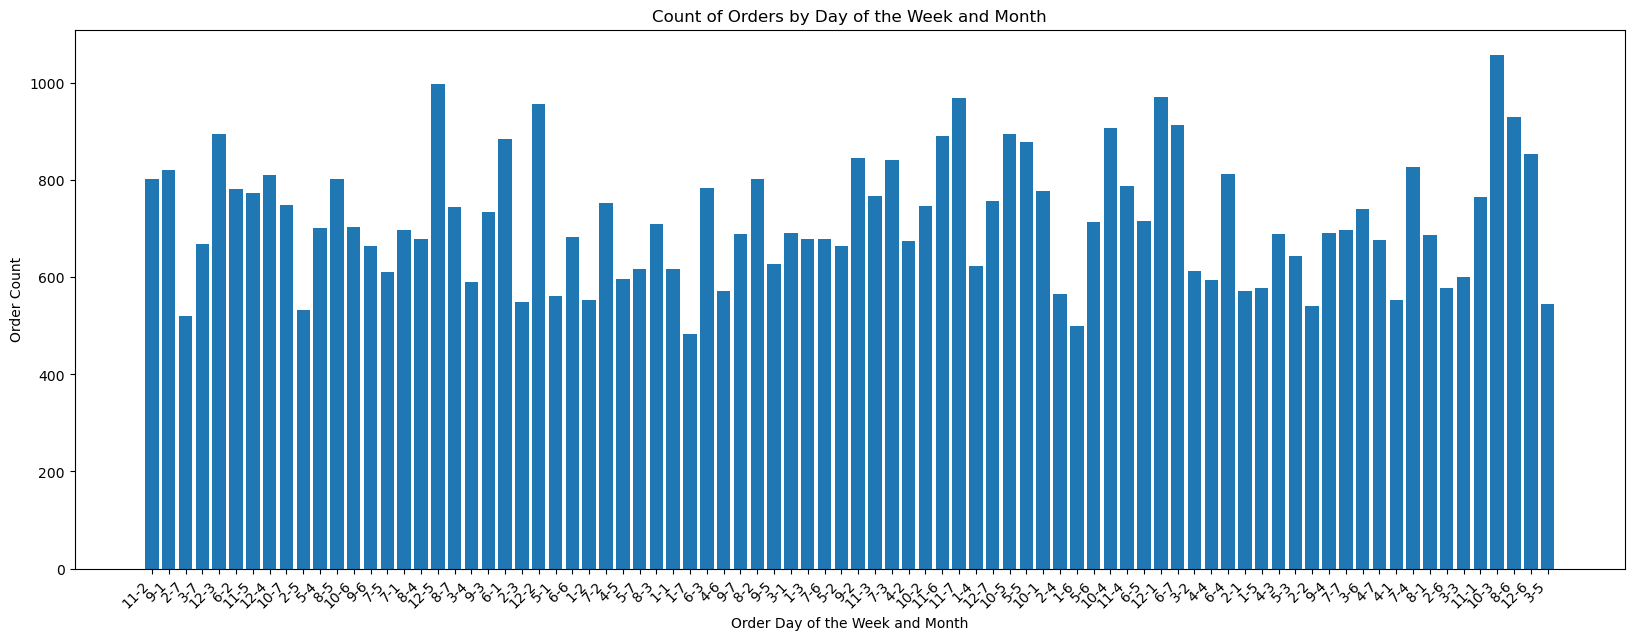

In [15]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import concat, col, lit
import matplotlib.pyplot as plt

# Assuming spark is your SparkSession and sales_filtered is your DataFrame
spark = SparkSession.builder.appName("example").getOrCreate()

# Create a new column 'OrderDayMonth' by combining 'OrderMonth' and 'OrderDayOfWeek'
sales_filtered = sales_filtered.withColumn('OrderDayMonth', concat(col('OrderMonth'), lit('-'), col('OrderDayOfWeek')))

# Group by the new column and count the occurrences
order_day_month_count = sales_filtered.groupBy('OrderDayMonth').count()

# Convert PySpark DataFrame to Pandas for plotting
order_day_month_count_pd = order_day_month_count.toPandas()

# Plotting the count of orders by day of the week and month
plt.figure(figsize=(20, 7))
plt.bar(order_day_month_count_pd['OrderDayMonth'], order_day_month_count_pd['count'])
plt.xlabel('Order Day of the Week and Month')
plt.ylabel('Order Count')
plt.title('Count of Orders by Day of the Week and Month')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


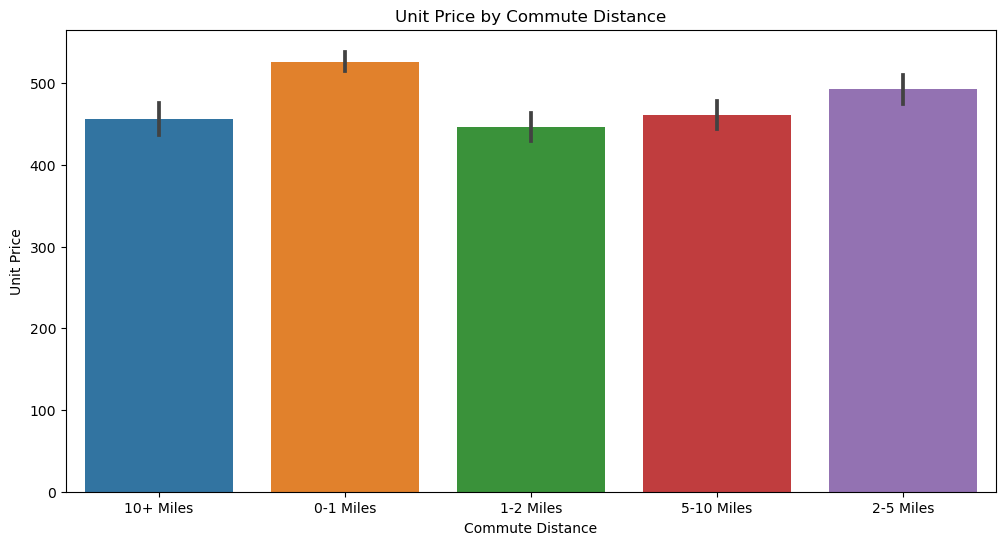

In [16]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Spark session
spark = SparkSession.builder.appName("example").getOrCreate()

# Assuming 'UnitPrice' and 'CommuteDistance' are the actual column names in your DataFrame
unit_price_column = 'UnitPrice'
commute_distance_column = 'CommuteDistance'

# Select the relevant columns from the DataFrame
plot_data = sales_filtered.select(commute_distance_column, unit_price_column).toPandas()

# Set up the barplot
plt.figure(figsize=(12, 6))
sns.barplot(x=commute_distance_column, y=unit_price_column, data=plot_data)
plt.xlabel('Commute Distance')
plt.ylabel('Unit Price')
plt.title('Unit Price by Commute Distance')
plt.show()


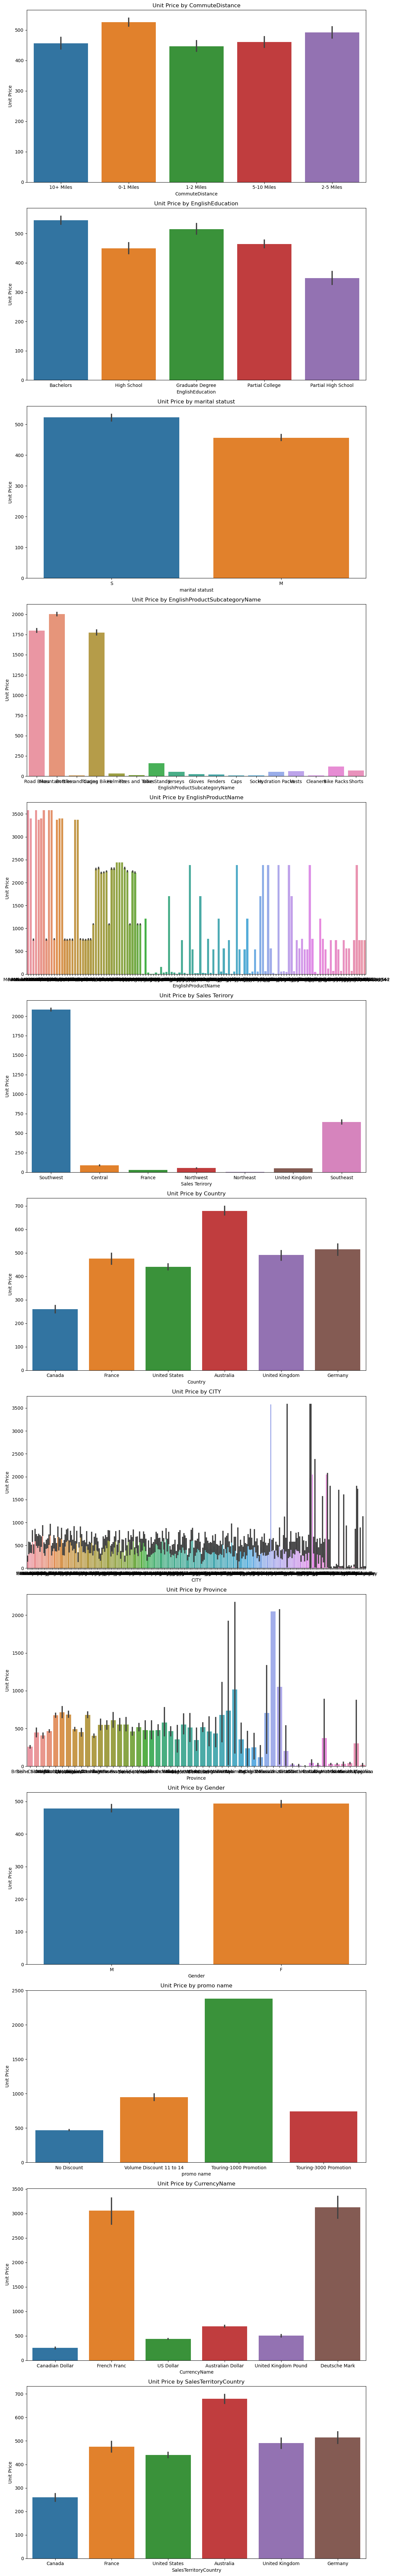

In [17]:
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Spark session
spark = SparkSession.builder.appName("example").getOrCreate()

# Assuming 'UnitPrice' is the actual column name in your DataFrame
unit_price_column = 'UnitPrice'

# List of categorical columns
categorical_columns = [
    'CommuteDistance', 'EnglishEducation', 'marital statust',
    'EnglishProductSubcategoryName', 'EnglishProductName', 'Sales Terirory',
    'Country', 'CITY', 'Province', 'Gender', 'promo name', 'CurrencyName',
    'SalesTerritoryCountry'
]

# Set up subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(12, 6 * len(categorical_columns)))

# Iterate through each categorical column and create bar plots
for i, column in enumerate(categorical_columns):
    # Select the relevant columns from the DataFrame
    plot_data = sales_filtered.select(column, unit_price_column).toPandas()

    # Create a bar plot
    sns.barplot(x=column, y=unit_price_column, data=plot_data, ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Unit Price')
    axes[i].set_title(f'Unit Price by {column}')

# Adjust layout for better readability
plt.tight_layout()
plt.show()



DataFrame for CommuteDistance:

  CommuteDistance  AverageUnitPrice         Category
0       0-1 Miles        526.005179  CommuteDistance
1       10+ Miles        456.192473  CommuteDistance
2       2-5 Miles        492.415180  CommuteDistance
3      5-10 Miles        460.965439  CommuteDistance
4       1-2 Miles        446.569147  CommuteDistance

DataFrame for EnglishEducation:

      EnglishEducation  AverageUnitPrice          Category
0          High School        449.421139  EnglishEducation
1  Partial High School        347.579720  EnglishEducation
2      Graduate Degree        515.001450  EnglishEducation
3      Partial College        464.629918  EnglishEducation
4            Bachelors        545.642798  EnglishEducation

DataFrame for marital statust:

  marital statust  AverageUnitPrice         Category
0               M        456.447452  marital statust
1               S        522.444306  marital statust

DataFrame for EnglishProductSubcategoryName:

   EnglishProductSubca

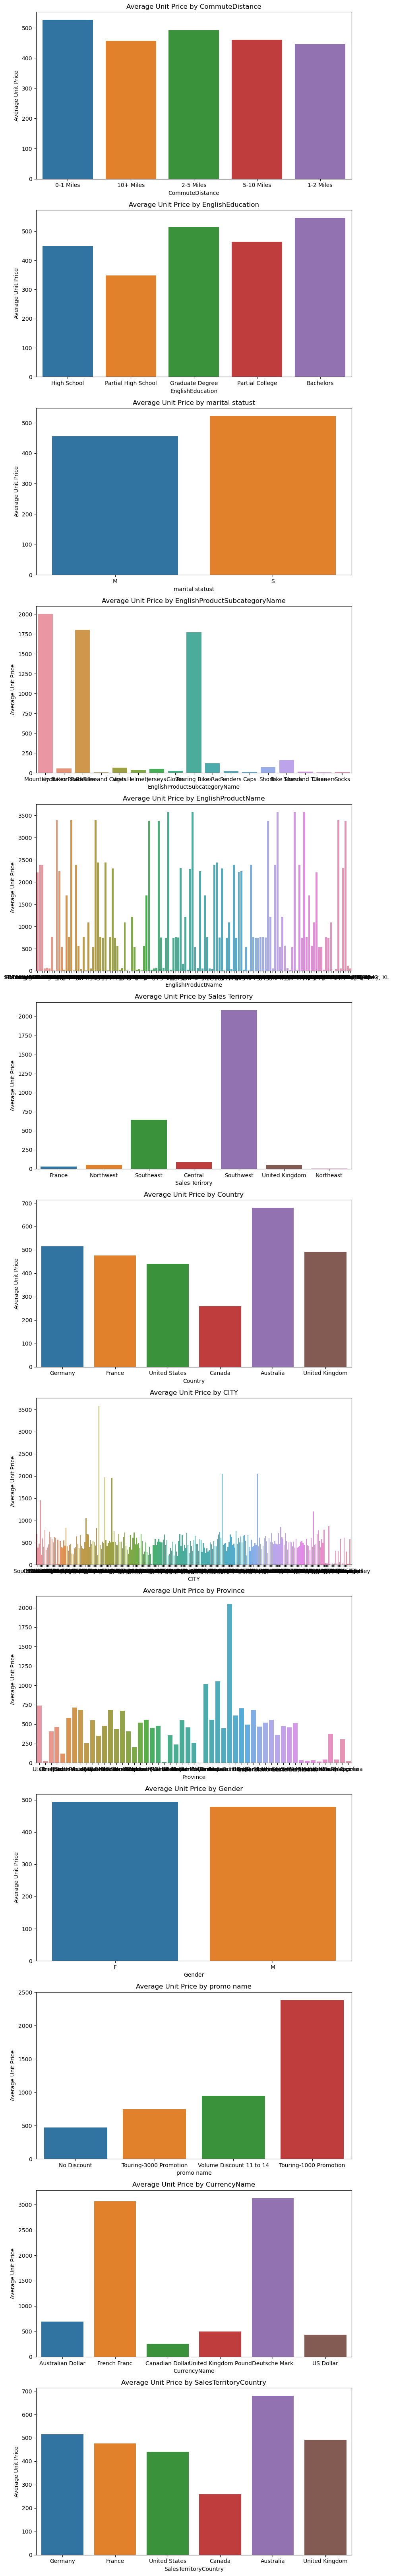

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql.functions import avg

# List of categorical columns
categorical_columns = ['CommuteDistance', 'EnglishEducation', 'marital statust',
                        'EnglishProductSubcategoryName', 'EnglishProductName', 'Sales Terirory',
                        'Country', 'CITY', 'Province', 'Gender', 'promo name', 'CurrencyName',
                        'SalesTerritoryCountry']

# Create an empty Pandas DataFrame to store results
result_pd = pd.DataFrame(columns=['Category', 'AverageUnitPrice'])

# Iterate through each categorical column and calculate the average UnitPrice
for column in categorical_columns:
    # Calculate average UnitPrice for each category using Spark
    avg_unit_price_df = sales_filtered.groupBy(column).agg(avg('UnitPrice').alias('AverageUnitPrice')).toPandas()
    
    # Add the results to the Pandas DataFrame
    avg_unit_price_df['Category'] = column
    result_pd = pd.concat([result_pd, avg_unit_price_df], ignore_index=True)
    
    # Print the DataFrame for the current column
    print(f"\nDataFrame for {column}:\n")
    print(avg_unit_price_df)

# Create subplots
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(10, 5 * len(categorical_columns)))

# Iterate through each categorical column and create bar plots
for i, column in enumerate(categorical_columns):
    # Filter data for the current column
    plot_data = result_pd[result_pd['Category'] == column]
    
    # Create a bar plot
    sns.barplot(x=column, y='AverageUnitPrice', data=plot_data, ax=axes[i])
    
    # Set plot labels and title
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Average Unit Price')
    axes[i].set_title(f'Average Unit Price by {column}')

    # Print the DataFrame used for the plot
    print(f"\nDataFrame used for the plot of {column}:\n")
    print(plot_data)

# Adjust layout
plt.tight_layout()
plt.show()


The table summary provides the average unit price for different categories within specific columns such as CommuteDistance, EnglishEducation, marital status, EnglishProductSubcategoryName, Sales Territory, Country, promo name, and CurrencyName. Let's analyze each section:

### CommuteDistance:
The average unit prices vary based on the distance customers commute. Notably, the highest average unit price is observed for customers with a commute distance of 0-1 Miles, suggesting that customers living very close tend to purchase higher-priced items.

### EnglishEducation:
Customers with different education levels exhibit variations in their purchasing behavior. Notably, customers with a Graduate Degree or Bachelors tend to spend more on average compared to those with only a High School or Partial High School education.

### Marital Status:
The average unit price varies between customers who are Single (S) and those who are Married (M). Married customers have a slightly higher average unit price, indicating potentially different spending patterns or preferences.

### EnglishProductSubcategoryName:
The type of product subcategory also influences the average unit price. For instance, products like Mountain Bikes, Road Bikes, and Touring Bikes have higher average prices compared to items like Bottles and Cages or Cleaners.

### Sales Territory:
Different sales territories exhibit varying average unit prices. For example, Southeast and Southwest territories have notably higher average unit prices compared to other regions, suggesting regional preferences or economic factors.

### Country:
Customers from different countries show variations in their average spending. For instance, customers from Australia tend to have a higher average unit price compared to customers from Canada.

### Promo Name:
The presence or absence of discounts, as indicated by different promo names, impacts the average unit price. Products associated with promotions like "Touring-1000 Promotion" or "Volume Discount 11 to 14" have significantly higher average prices.

### Currency Name:
The choice of currency also plays a role in determining the average unit price. For instance, products priced in French Franc or Deutsche Mark have notably higher average unit prices compared to products priced in US Dollars.

**Explanation:**
These insights can help in tailoring marketing strategies, pricing models, and inventory management based on the observed variations in average unit prices across different customer segments, product categories, and regions. Understanding these patterns can contribute to more targeted and effective business decisions. For instance, it might be beneficial to offer specific promotions or adjust pricing strategies based on the preferences and behaviors of customers with different educational backgrounds, marital statuses, or geographic locations.

In [19]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import month, year, current_date, datediff, to_date, col

# Initialize Spark session
spark = SparkSession.builder.appName("example").getOrCreate()

# Assuming you have a Spark DataFrame named sales_filtered
# Replace 'your_data.csv' with the actual data source
# sales_filtered = spark.read.csv('your_data.csv', header=True, inferSchema=True)

# Convert "birthdate" to date type
sales_filtered = sales_filtered.withColumn("birthdate", to_date("birthdate", "M/d/yyyy"))

# Extract birth month and birth year
sales_filtered = sales_filtered.withColumn("BirthMonth", month("birthdate"))
sales_filtered = sales_filtered.withColumn("BirthYear", year("birthdate"))

# Calculate age based on the assumption that the current year is 2014
sales_filtered = sales_filtered.withColumn("Age", 
    (datediff(current_date(), "birthdate") / 365).cast("int")
)

# Show the resulting DataFrame
sales_filtered.show()

+-----------+---------------+-------------------+---------------+-----------------------------+--------------------+------------+----------+-----------+--------------+--------------+-------------+-------------------+---------------+--------------+-------------------+--------------+-------------+----------+------+-----------+--------------------+---------------------+----------------+-------------+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+------+-------+---------+-------+--------+----------+--------------+-------------+----------+---------+---+
|CustomerKey|CommuteDistance|   EnglishEducation|marital statust|EnglishProductSubcategoryName|  EnglishProductName|OrderDateKey|DueDateKey|ShipDateKey|Sales Terirory|       Country|         CITY|           Province|NumberCarsOwned|HouseOwnerFlag|number  fo children|total children|annual income| birthdate|Gender| promo name|        CurrencyName|SalesTerritoryCountry|SalesAmountQu

# Data analysis and modeling
for theis analysi we drop teh key columns as theyre not factors to be conisdeered in he analysis. and also the dates column

In [20]:
spark = SparkSession.builder.appName("example").getOrCreate()


# List all columns to drop
columns_to_drop = [
    col for col in sales_filtered.columns 
    if any(keyword in col.lower() for keyword in ['key', 'orderdate', 'duedate', 'shipdate','birthdate','SalesOrderNumber','CarrierTrackingNumber','CustomerPONumber'])
]

# Drop the identified columns from the DataFrame
sales_filtered_filtered = sales_filtered.drop(*columns_to_drop)

# Show the resulting DataFrame
sales_filtered_filtered.show()

+---------------+-------------------+---------------+-----------------------------+--------------------+--------------+--------------+-------------+-------------------+---------------+--------------+-------------------+--------------+-------------+------+-----------+--------------------+---------------------+----------------+-------------+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+------+-------+----------+--------------+-------------+----------+---------+---+
|CommuteDistance|   EnglishEducation|marital statust|EnglishProductSubcategoryName|  EnglishProductName|Sales Terirory|       Country|         CITY|           Province|NumberCarsOwned|HouseOwnerFlag|number  fo children|total children|annual income|Gender| promo name|        CurrencyName|SalesTerritoryCountry|SalesAmountQuote|OrderQuantity|UnitPrice|ExtendedAmount|UnitPriceDiscountPct|DiscountAmount|ProductStandardCost|TotalProductCost|SalesAmount|TaxAmt|Freight|Or

# CLASSIFICATION MODELS



##  Logistics regression

In [21]:
import pyspark.sql.functions as F
from pyspark.sql.window import Window

# Assuming df is your PySpark DataFrame
categorical_columns = ['CommuteDistance', 'EnglishEducation', 'marital statust', 
                        'EnglishProductSubcategoryName', 'EnglishProductName', 'Sales Terirory',
                        'Country', 'CITY', 'Province', 'Gender', 'promo name', 
                        'CurrencyName', 'SalesTerritoryCountry']
df = sales_filtered_filtered
# Convert to integers based on unique values
for column in categorical_columns:
    df = df.withColumn(column, F.dense_rank().over(Window.orderBy(column)))

# Now your DataFrame should have the specified columns encoded as integers.
df.show()

+---------------+----------------+---------------+-----------------------------+------------------+--------------+-------+----+--------+---------------+--------------+-------------------+--------------+-------------+------+----------+------------+---------------------+----------------+-------------+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+------+-------+----------+--------------+-------------+----------+---------+---+
|CommuteDistance|EnglishEducation|marital statust|EnglishProductSubcategoryName|EnglishProductName|Sales Terirory|Country|CITY|Province|NumberCarsOwned|HouseOwnerFlag|number  fo children|total children|annual income|Gender|promo name|CurrencyName|SalesTerritoryCountry|SalesAmountQuote|OrderQuantity|UnitPrice|ExtendedAmount|UnitPriceDiscountPct|DiscountAmount|ProductStandardCost|TotalProductCost|SalesAmount|TaxAmt|Freight|OrderMonth|OrderDayOfWeek|OrderDayMonth|BirthMonth|BirthYear|Age|
+---------------+-

In [22]:
from pyspark.sql.functions import col


for column_name in df.columns:
    df = df.withColumn(column_name, col(column_name).cast('int'))

# Show the updated DataFrame
df.show()


+---------------+----------------+---------------+-----------------------------+------------------+--------------+-------+----+--------+---------------+--------------+-------------------+--------------+-------------+------+----------+------------+---------------------+----------------+-------------+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+------+-------+----------+--------------+-------------+----------+---------+---+
|CommuteDistance|EnglishEducation|marital statust|EnglishProductSubcategoryName|EnglishProductName|Sales Terirory|Country|CITY|Province|NumberCarsOwned|HouseOwnerFlag|number  fo children|total children|annual income|Gender|promo name|CurrencyName|SalesTerritoryCountry|SalesAmountQuote|OrderQuantity|UnitPrice|ExtendedAmount|UnitPriceDiscountPct|DiscountAmount|ProductStandardCost|TotalProductCost|SalesAmount|TaxAmt|Freight|OrderMonth|OrderDayOfWeek|OrderDayMonth|BirthMonth|BirthYear|Age|
+---------------+-

In [23]:
# Assuming your DataFrame is named df
data_types = df.dtypes

# Display the data types
print(data_types)


[('CommuteDistance', 'int'), ('EnglishEducation', 'int'), ('marital statust', 'int'), ('EnglishProductSubcategoryName', 'int'), ('EnglishProductName', 'int'), ('Sales Terirory', 'int'), ('Country', 'int'), ('CITY', 'int'), ('Province', 'int'), ('NumberCarsOwned', 'int'), ('HouseOwnerFlag', 'int'), ('number  fo children', 'int'), ('total children', 'int'), ('annual income', 'int'), ('Gender', 'int'), ('promo name', 'int'), ('CurrencyName', 'int'), ('SalesTerritoryCountry', 'int'), ('SalesAmountQuote', 'int'), ('OrderQuantity', 'int'), ('UnitPrice', 'int'), ('ExtendedAmount', 'int'), ('UnitPriceDiscountPct', 'int'), ('DiscountAmount', 'int'), ('ProductStandardCost', 'int'), ('TotalProductCost', 'int'), ('SalesAmount', 'int'), ('TaxAmt', 'int'), ('Freight', 'int'), ('OrderMonth', 'int'), ('OrderDayOfWeek', 'int'), ('OrderDayMonth', 'int'), ('BirthMonth', 'int'), ('BirthYear', 'int'), ('Age', 'int')]


In [24]:
from pyspark.sql import SparkSession
import pandas as pd


# Convert Spark DataFrame to Pandas DataFrame
sales_filtered_pandas = sales_filtered_filtered.toPandas()

# Specify the path where you want to save the Excel file
output_path = "output.xlsx"

# Write the Pandas DataFrame to an Excel file
sales_filtered_pandas.to_excel(output_path, index=False)

# Print a message indicating the successful write
print(f"DataFrame has been successfully written to {output_path}")


# Create Spark session
spark = SparkSession.builder.appName("example").getOrCreate()

# Load Excel file into pandas DataFrame
file_path = "output.xlsx"
df_pandas = pd.read_excel(file_path)

# Convert pandas DataFrame to Spark DataFrame
df_spark = spark.createDataFrame(df_pandas)

# Show the Spark DataFrame
try:
    df_spark.show()
except Exception as e:
    print(e)


DataFrame has been successfully written to output.xlsx
+---------------+-------------------+---------------+-----------------------------+--------------------+--------------+--------------+-------------+-------------------+---------------+--------------+-------------------+--------------+-------------+------+-----------+--------------------+---------------------+----------------+-------------+---------+--------------+--------------------+--------------+-------------------+----------------+-----------+------+-------+----------+--------------+-------------+----------+---------+---+
|CommuteDistance|   EnglishEducation|marital statust|EnglishProductSubcategoryName|  EnglishProductName|Sales Terirory|       Country|         CITY|           Province|NumberCarsOwned|HouseOwnerFlag|number  fo children|total children|annual income|Gender| promo name|        CurrencyName|SalesTerritoryCountry|SalesAmountQuote|OrderQuantity|UnitPrice|ExtendedAmount|UnitPriceDiscountPct|DiscountAmount|ProductStan

In [25]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml import Pipeline
from pyspark.sql.functions import col


# Target variable
target_variable = 'Gender'

# Get all columns except the target variable
feature_columns = [col for col in df_spark.columns if col != target_variable]

# Assemble the features into a vector
vector_assembler = VectorAssembler(inputCols=feature_columns, outputCol='features')

# Initialize Logistic Regression model
logistic_regression = LogisticRegression(featuresCol='features', labelCol=target_variable)

# Create a pipeline with the vector assembler and logistic regression model
pipeline = Pipeline(stages=[vector_assembler, logistic_regression])

# Fit the pipeline to the DataFrame
model = pipeline.fit(df_spark)

# Make predictions on the DataFrame
predictions = model.transform(df_spark)

# Show the predictions
predictions.select(target_variable, 'features', 'rawPrediction', 'probability', 'prediction').show()


IllegalArgumentException: Data type string of column CommuteDistance is not supported.
Data type string of column EnglishEducation is not supported.
Data type string of column marital statust is not supported.
Data type string of column EnglishProductSubcategoryName is not supported.
Data type string of column EnglishProductName is not supported.
Data type string of column Sales Terirory is not supported.
Data type string of column Country is not supported.
Data type string of column CITY is not supported.
Data type string of column Province is not supported.
Data type string of column promo name is not supported.
Data type string of column CurrencyName is not supported.
Data type string of column SalesTerritoryCountry is not supported.
Data type string of column OrderDayMonth is not supported.